In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')

In [47]:
train = pd.read_csv('data/train_null_only.csv')
test = pd.read_csv('data/test_null_only.csv')
submission = pd.read_csv('data/submission.csv')

In [28]:
train.shape, test.shape

((1459, 11), (715, 10))

## IQR 함수 선언

In [29]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

## hour_bef_ozone

In [30]:
outlier_iqr(train,'hour_bef_ozone')

data_hour_bef_ozone = train[(train['hour_bef_ozone'] < upper) & (train['hour_bef_ozone'] > lower)]
len(data_hour_bef_ozone)

IQR은 0.024999999999999998 이다.
lower bound 값은 -0.0115 이다.
upper bound 값은 0.0885 이다.
총 이상치 개수는 16 이다.


1443

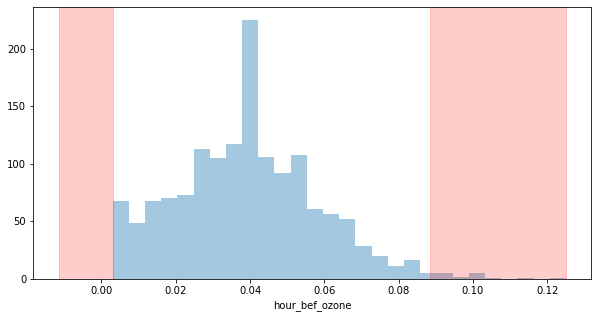

In [31]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_ozone, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_ozone.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_ozone.max(), alpha=0.2, color='red')

### hour_bef_ozone 이상치 16개 제거

In [32]:
train['hour_bef_ozone'] = data_hour_bef_ozone['hour_bef_ozone']

In [33]:
train['hour_bef_ozone'].isnull().sum()

16

### 결측치 시간당 평균량으로 대체

In [34]:
train['hour_bef_ozone'].fillna(value = train.groupby('hour').mean()['hour_bef_ozone'].mean(), inplace = True)

In [35]:
train['hour_bef_ozone'].isnull().sum()

0

## test 셋도 ozone 이상치 제거

In [36]:
outlier_iqr(test,'hour_bef_ozone')

data_hour_bef_ozone = test[(test['hour_bef_ozone'] < upper) & (test['hour_bef_ozone'] > lower)]
len(data_hour_bef_ozone)

IQR은 0.023499999999999997 이다.
lower bound 값은 -0.007249999999999996 이다.
upper bound 값은 0.08675 이다.
총 이상치 개수는 19 이다.


696

In [37]:
test['hour_bef_ozone'] = data_hour_bef_ozone['hour_bef_ozone']

In [38]:
test['hour_bef_ozone'].isnull().sum()

19

In [39]:
test['hour_bef_ozone'].fillna(value = test.groupby('hour').mean()['hour_bef_ozone'].mean(), inplace = True)

In [40]:
test['hour_bef_ozone'].isnull().sum()

0

### 오존 IQR 전처리 데이터셋 생성

In [41]:
train.to_csv("train_ozone.csv", index = False)

In [42]:
test.to_csv("test_ozone.csv", index = False)

## 모델 훈련

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 
            'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [45]:
model100 = RandomForestRegressor(n_estimators = 100, random_state = 0)

model100.fit(X_train, y_train)

ypred1 = model100.predict(X_test)

In [49]:
submission['count'] = ypred1
submission.to_csv("model100_ozone.csv", index = False)